# CASA Imaging

## Goals

- Understand and perform the CLEAN algorithm
- Perform spatial imaging
- Perform spectral imaging

## Requirements

```
pip install matplotlib
pip install astropy
pip install casatasks
pip install spectral_cube
```


In [ ]:
# If you need to download the dataset
# import os
# os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
# os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

In [1]:
from casatasks import tclean, exportfits

vis = "sis14_twhya_calibrated_flagged.ms"
img_name = "sis_twhya"

spatial_img = f"{img_name}_spatial"
spatial_img_fits = f"{spatial_img}.fits"


spectral_img = f"{img_name}_spectral"
spectral_img_fits = f"{spectral_img}.fits"


In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

def dispImage(imname='sim_onepoint_true.im', naxis=2):
    hdu = fits.open(imname)[0]
    wcs = WCS(hdu.header,naxis=naxis)
    fig = plt.figure()
    ax = fig.add_subplot(121, projection=wcs)
    im = plt.imshow(hdu.data[0,0,:,:], origin='lower', cmap=plt.cm.viridis)
    plt.xlabel('RA')
    plt.ylabel('DEC')
#     plt.colorbar(im, ax=ax)
        

## Spatial Image

In [8]:
import os

os.system(f"rm -rf sis_twhya_spatial*")

tclean(vis=vis, imagename=spatial_img,
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000,
       interactive=False, savemodel='modelcolumn')

exportfits(imagename=spatial_img + ".image", fitsimage=spatial_img_fits, overwrite=True)/

{}

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


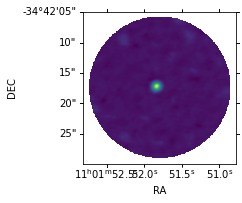

In [25]:
dispImage(spatial_img_fits)

## Spectral Image

In [13]:
import os

os.system(f"rm -rf sis_twhya_spectral*")

tclean(vis=vis, imagename=spectral_img,
       field='5', spw='', specmode='cube', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000,
       interactive=False, savemodel='modelcolumn')


# tclean(vis=vis,
#        imagename=spectral_img,
#        datacolumn='data',
#        imsize=512,
#        cell='8.0arcsec',
#        specmode='cube',
#        interpolation='nearest',
#        gridder='standard',
#        niter=200,
#        gain=0.3,
#        savemodel='modelcolumn')

exportfits(imagename=spectral_img + ".image", fitsimage=spectral_img_fits, overwrite=True)

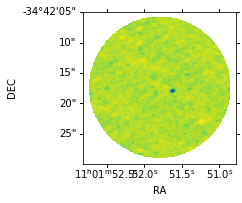

In [28]:
dispImage(spectral_img_fits, naxis=2)

In [3]:
import astropy.units as u
from astropy.utils import data
from spectral_cube import SpectralCube

fn = data.get_pkg_data_filename(spectral_img_fits)
cube = SpectralCube.read(fn)

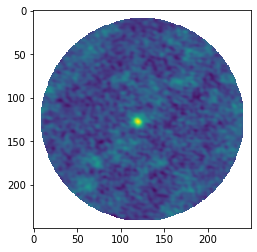

In [6]:
cube[50,:,:].quicklook()